# Initial Analysis

## Imports

In [1]:
from db_cleaner import DataTransform
from db_analysis import DataFrameInfo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Types of Columns

In [2]:
untransformed_column_data = DataTransform()
transformed_column_data = untransformed_column_data.transform_columns()
print(transformed_column_data.dtypes)

id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                    Int64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                      object
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             Int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

## Shape of Dataframe

In [3]:
print(transformed_column_data.shape)

(54231, 43)


## View Statistics of Column 
### Input column name into function

In [4]:
executer = DataFrameInfo(transformed_column_data)
column_statistics = executer.extract_statistical_values('annual_inc')
print(column_statistics)

Mean of column 'annual_inc' = 72220.85, Median = 61000.00, Standard Deviation = 51588.86


## Count Distinct Values in Categorial Type Columns

In [5]:
column_distinct_values = executer.count_distinct_values('payment_plan')
print(column_distinct_values)

Column 'payment_plan' has 2 distinct categorical values.


## Calculate Null Percentages

In [6]:
null_value_summary = executer.null_value_summary()
print(null_value_summary)

                             Null Count  Null Percentage  Non-Null Values
id                                    0         0.000000            54231
member_id                             0         0.000000            54231
loan_amount                           0         0.000000            54231
funded_amount                      3007         5.544799            51224
funded_amount_inv                     0         0.000000            54231
term                               4772         8.799395            49459
int_rate                           5169         9.531449            49062
instalment                            0         0.000000            54231
grade                                 0         0.000000            54231
sub_grade                             0         0.000000            54231
employment_length                  2118         3.905515            52113
home_ownership                        0         0.000000            54231
annual_inc                            

## Visualise null value summary - before

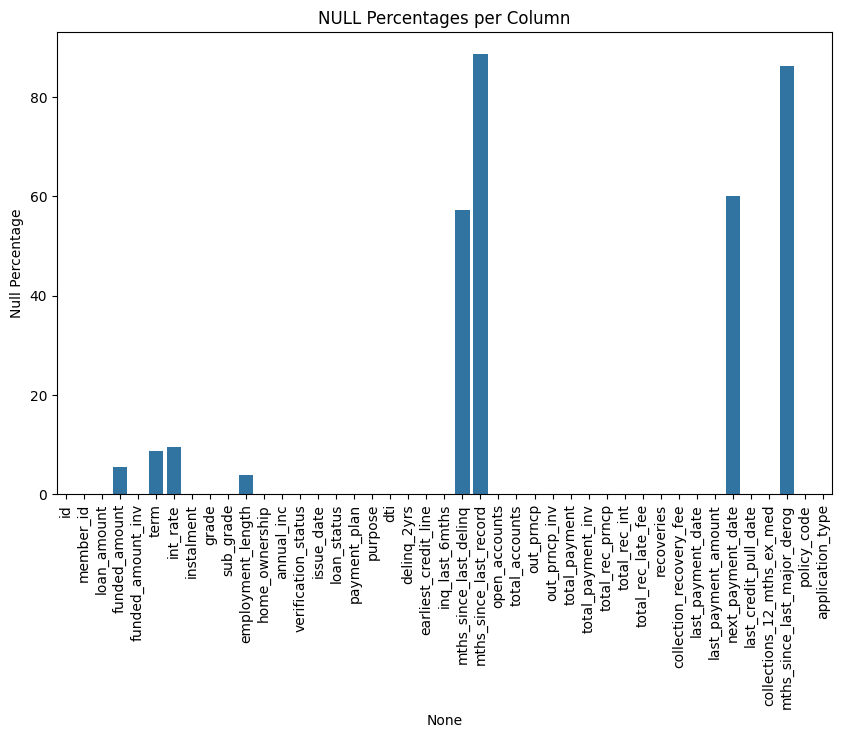

In [7]:

# Visualize NULL percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=null_value_summary.index, y=null_value_summary['Null Percentage'])
plt.title("NULL Percentages per Column")
plt.xticks(rotation=90)
plt.show()

## Drop Columns with Null Percentage > 50%

In [8]:
executer.drop_columns_with_high_nulls(50)

Dropped columns: ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,A4,...,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-01-01,0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,A3,...,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-01-01,0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36,7.49,497.63,A,A4,...,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,2021-10-01,0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36,14.31,514.93,C,C4,...,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,2021-06-01,0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,A1,...,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-01-01,0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36,9.01,159.03,B,B2,...,724.82,0.000000,0.00,0.00,2016-07-01,160.61,2016-07-01,<NA>,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36,10.59,162.73,C,C2,...,826.31,104.942381,0.00,0.00,2016-10-01,490.01,2016-09-01,0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36,7.43,108.77,A,A2,...,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2013-05-01,<NA>,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36,7.43,155.38,A,A2,...,174.18,0.000000,0.00,0.00,2014-03-01,0.00,2013-05-01,<NA>,1,INDIVIDUAL


In [9]:
executer.input_missing_values()
analysis_dataframe = executer.input_missing_values()
analysis_dataframe.to_csv('analysis_dataframe.csv', index=False)


Imputed missing values in numeric column 'funded_amount' with median.
Imputed missing values in numeric column 'term' with median.
Imputed missing values in numeric column 'int_rate' with median.
Imputed missing values in categorical column 'employment_length' with mode.
Imputed missing values in numeric column 'collections_12_mths_ex_med' with median.


/Users/anoshmalik/AiCore/Exploratory Data Analysis - Customer Loans in Finance/db_analysis.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.transformed_column_data[col].fillna(self.transformed_column_data[col].median(), inplace=True)
/Users/anoshmalik/AiCore/Exploratory Data Analysis - Customer Loans in Finance/db_analysis.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method

# Visualize null summary - after

In [10]:
null_value_summary = executer.null_value_summary()
print(null_value_summary)

                            Null Count  Null Percentage  Non-Null Values
id                                   0         0.000000            54231
member_id                            0         0.000000            54231
loan_amount                          0         0.000000            54231
funded_amount                        0         0.000000            54231
funded_amount_inv                    0         0.000000            54231
term                                 0         0.000000            54231
int_rate                             0         0.000000            54231
instalment                           0         0.000000            54231
grade                                0         0.000000            54231
sub_grade                            0         0.000000            54231
employment_length                    0         0.000000            54231
home_ownership                       0         0.000000            54231
annual_inc                           0         0.00

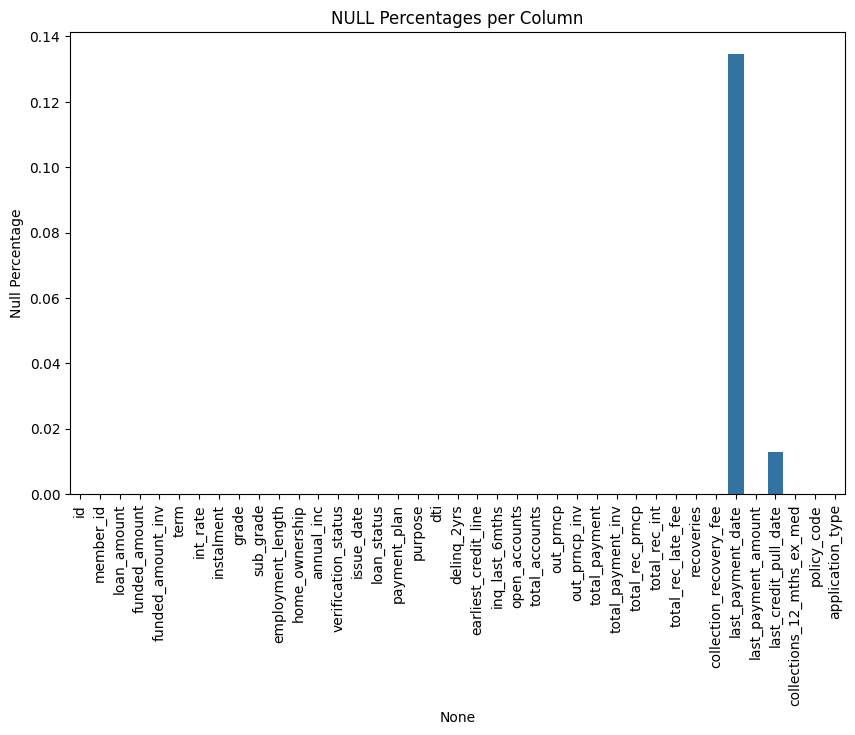

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=null_value_summary.index, y=null_value_summary['Null Percentage'])
plt.title("NULL Percentages per Column")
plt.xticks(rotation=90)
plt.show()

## Visualise and Correct Skewness

In [12]:
skewed_columns = executer.identify_skewed_columns(threshold=2)
print(f"Skewed Columns: {skewed_columns}")

Skewed Columns (Threshold 2): ['id', 'member_id', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
Skewed Columns: ['id', 'member_id', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


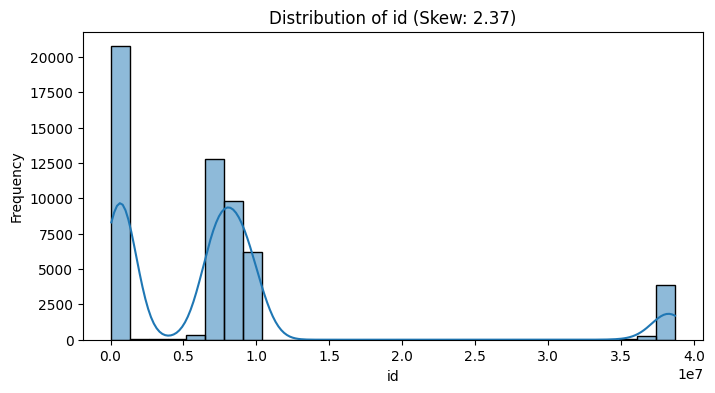

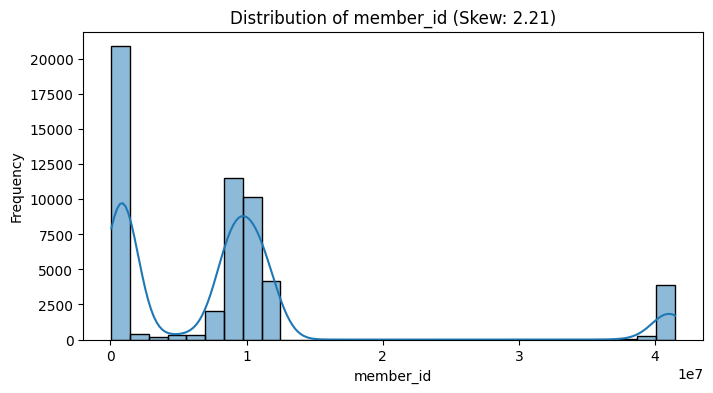

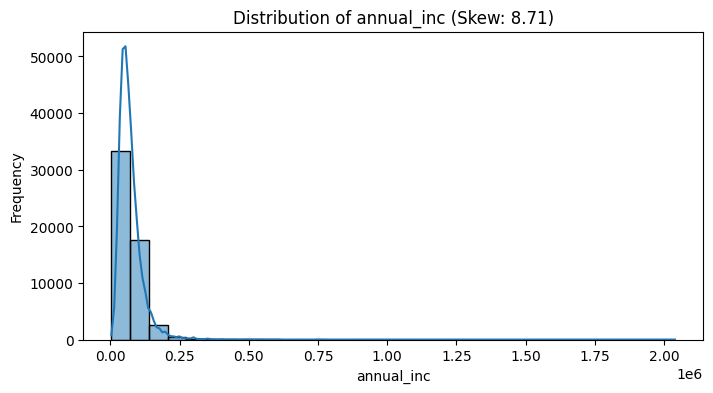

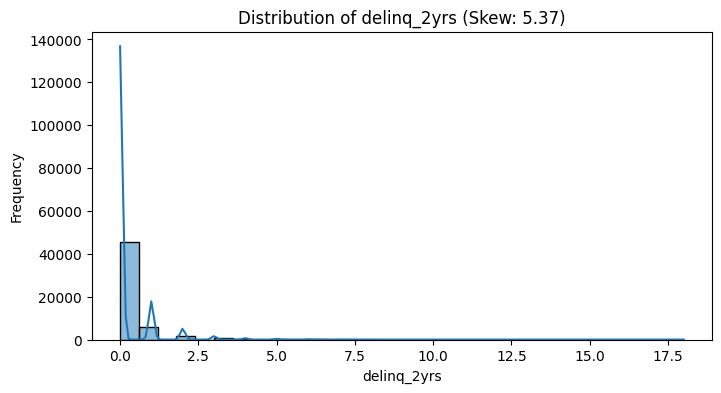

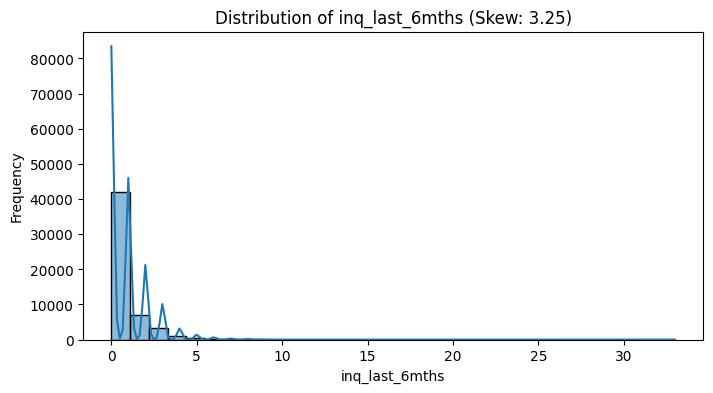

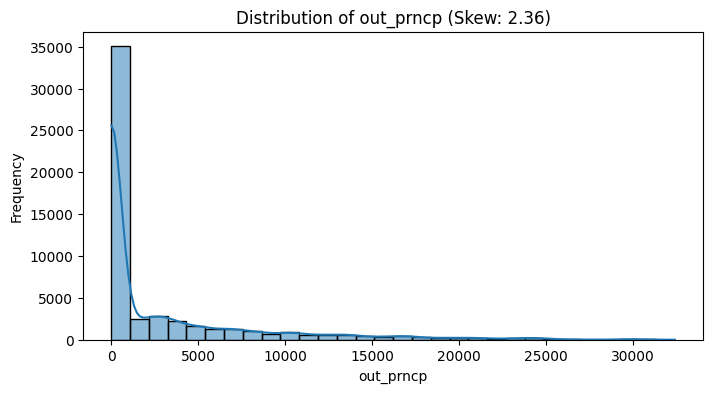

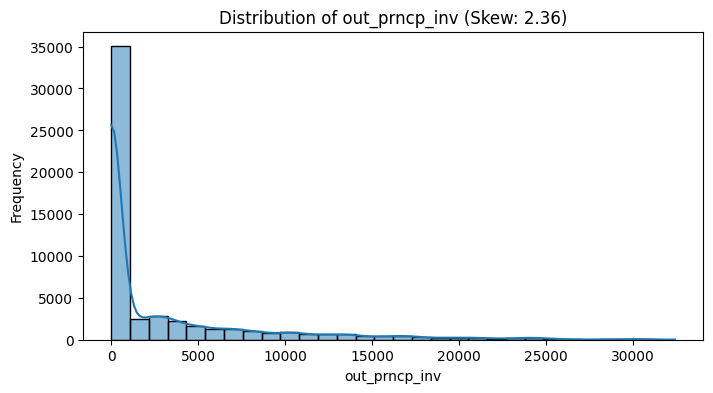

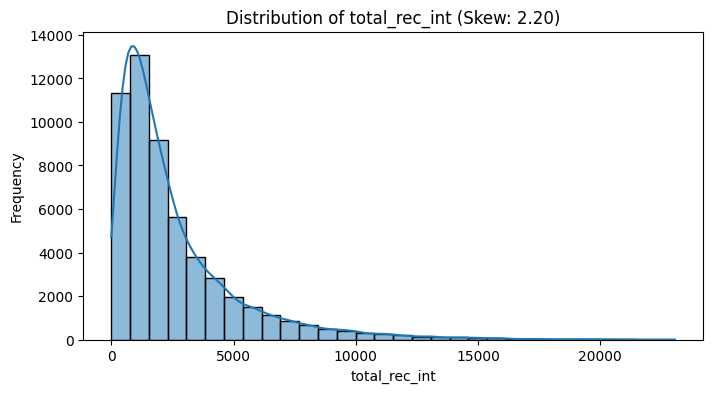

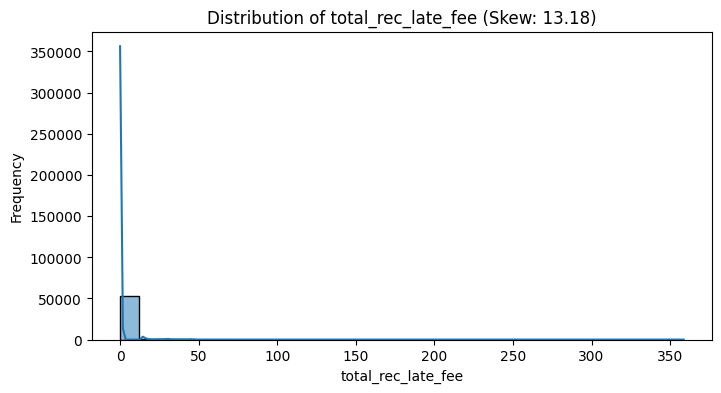

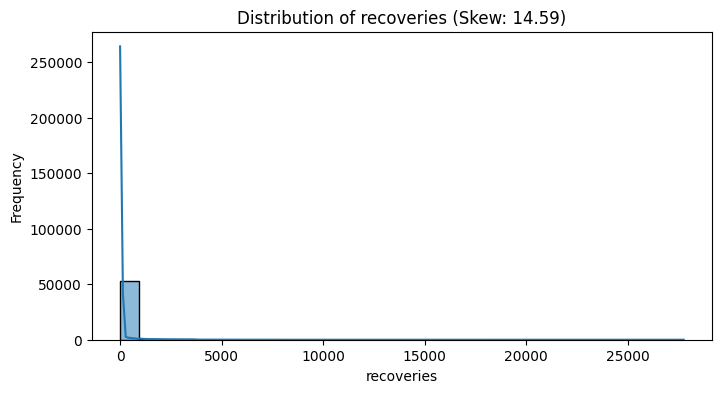

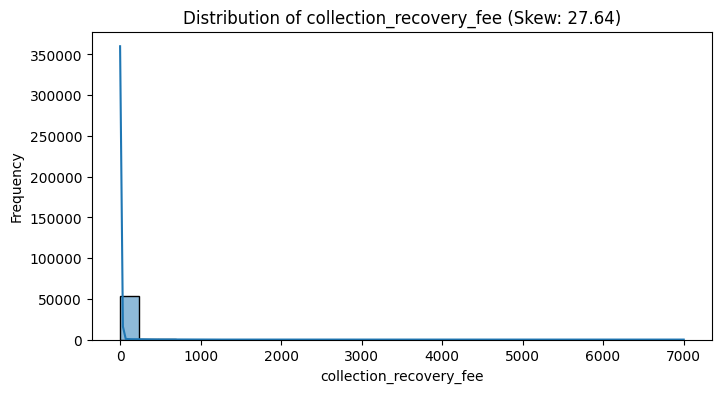

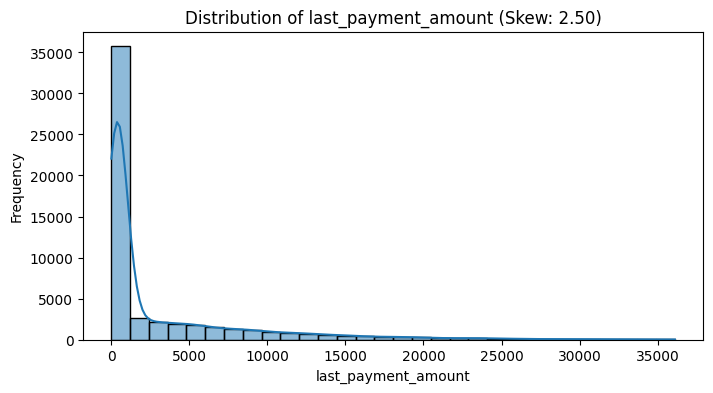

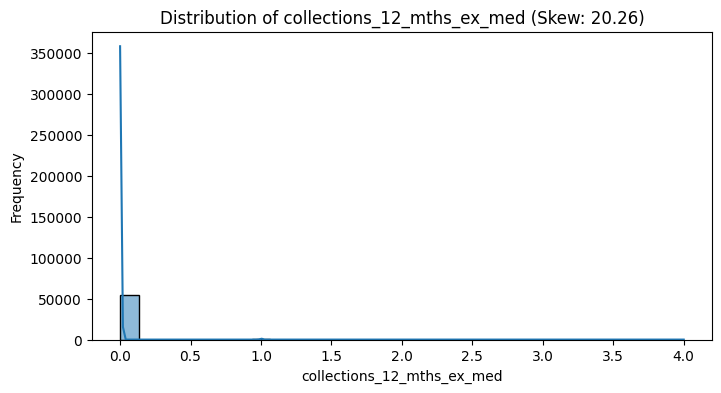

In [13]:
from db_analysis import Plotter
plotter = Plotter(executer.transformed_column_data)
plotter.visualize_skewness(executer.transformed_column_data, skewed_columns)

In [14]:
best_transformations = executer.transform_skewed_columns(skewed_columns)

Applied yeojohnson transformation to 'id' (Skewness: 0.0957)
Applied yeojohnson transformation to 'member_id' (Skewness: 0.1022)
Applied boxcox transformation to 'annual_inc' (Skewness: 0.0080)
Applied yeojohnson transformation to 'delinq_2yrs' (Skewness: 1.8694)
Applied yeojohnson transformation to 'inq_last_6mths' (Skewness: 0.2510)
Applied yeojohnson transformation to 'out_prncp' (Skewness: 0.5329)
Applied yeojohnson transformation to 'out_prncp_inv' (Skewness: 0.5329)
Applied yeojohnson transformation to 'total_rec_int' (Skewness: 0.0208)
Applied yeojohnson transformation to 'total_rec_late_fee' (Skewness: 5.2790)
Applied yeojohnson transformation to 'recoveries' (Skewness: 3.4463)
Applied yeojohnson transformation to 'collection_recovery_fee' (Skewness: 3.5883)
Applied yeojohnson transformation to 'last_payment_amount' (Skewness: 0.0018)
Applied yeojohnson transformation to 'collections_12_mths_ex_med' (Skewness: 16.0155)


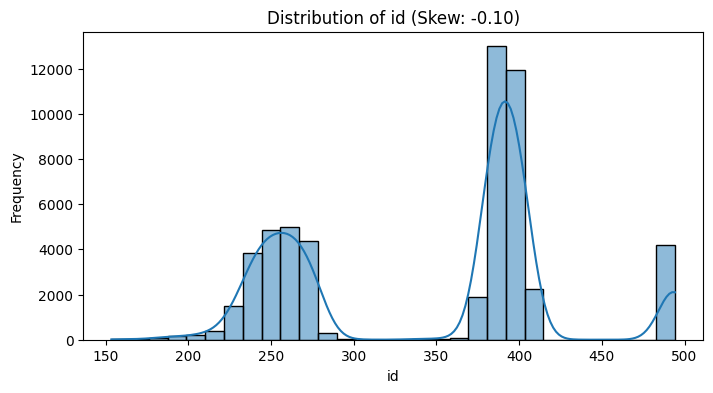

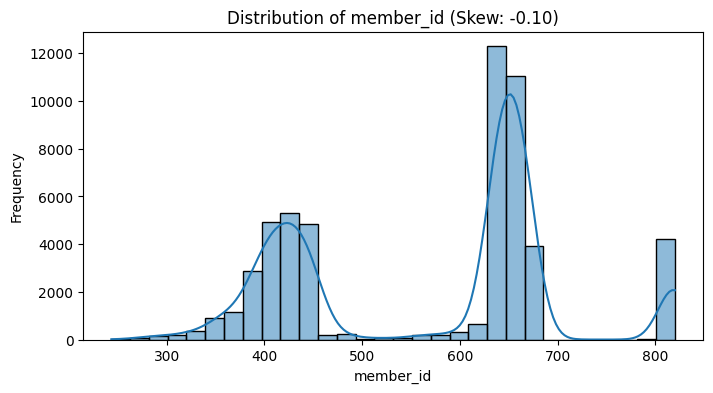

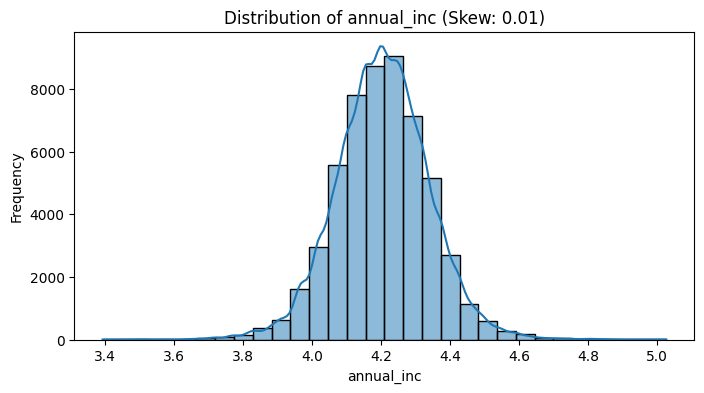

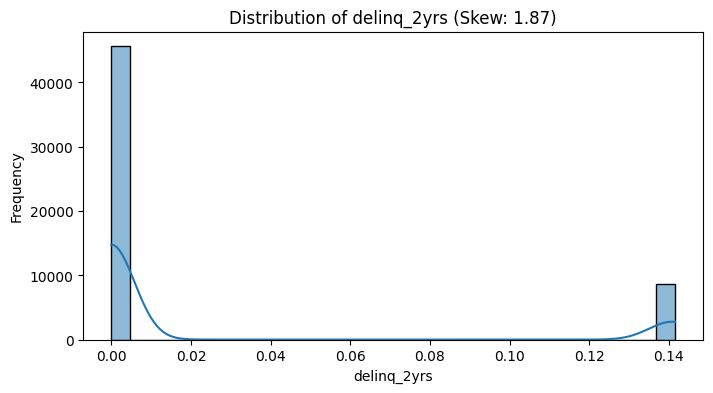

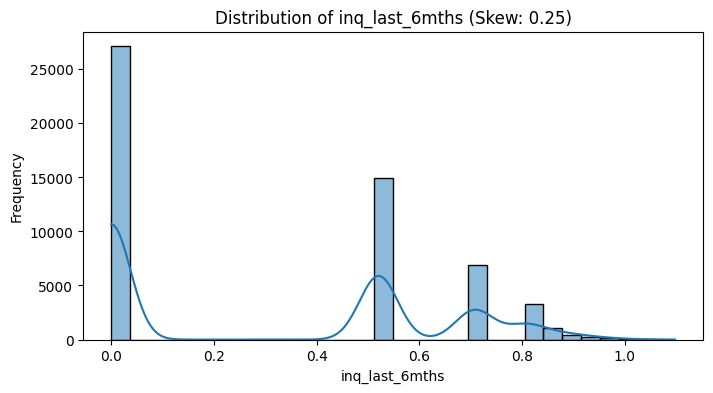

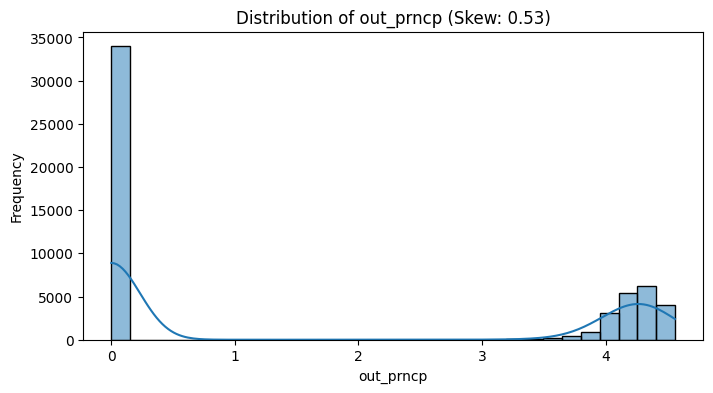

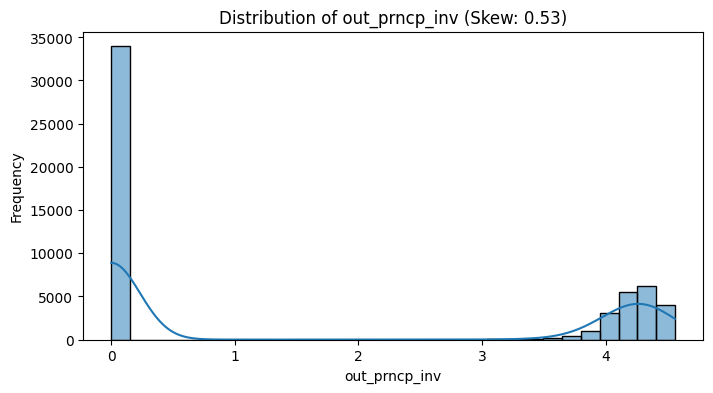

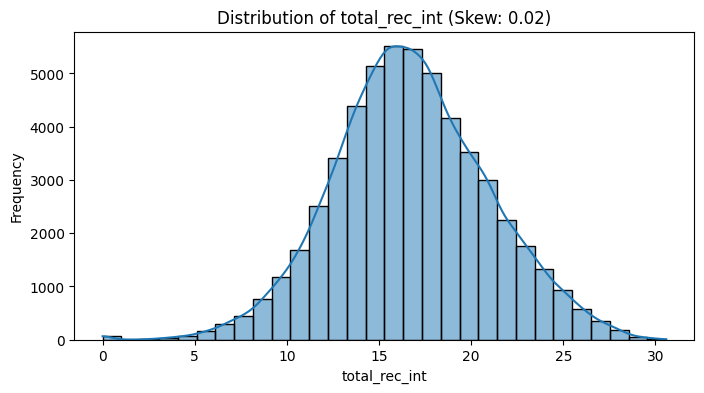

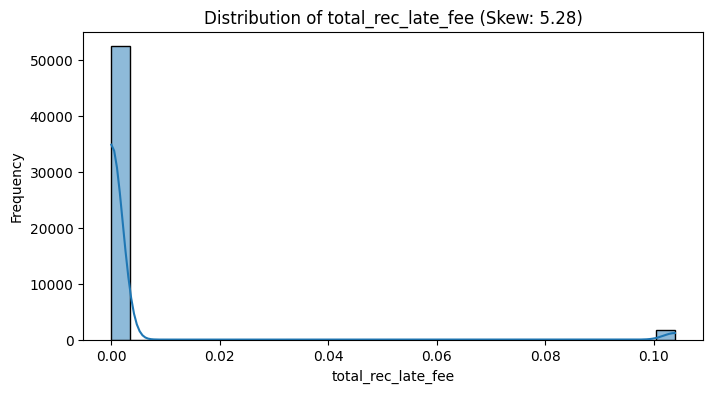

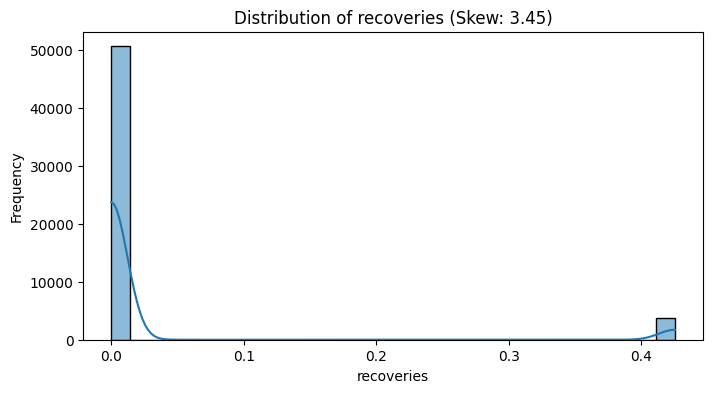

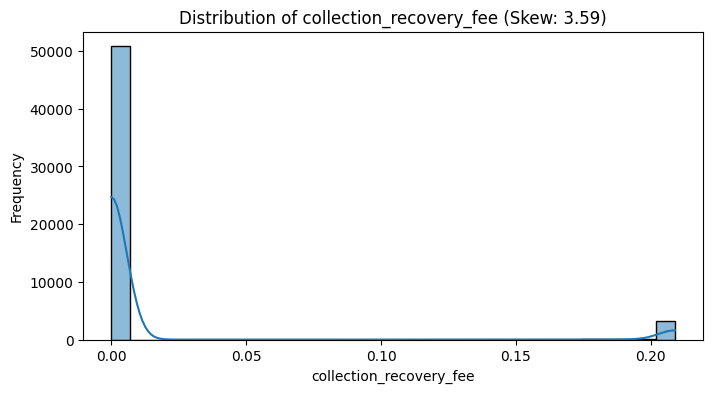

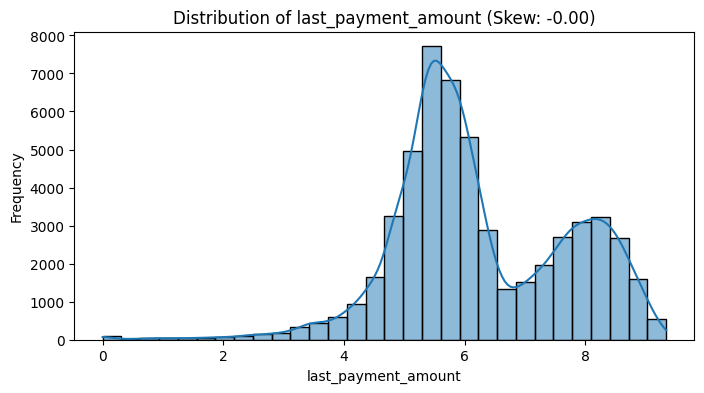

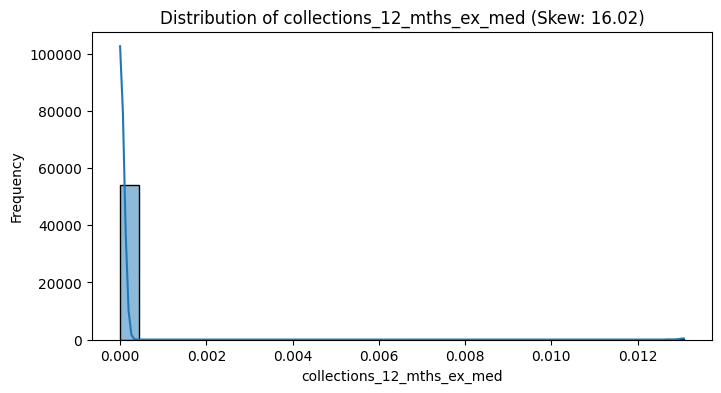

In [15]:
plotter.visualize_skewness(executer.transformed_column_data, skewed_columns)

## Outlier Visualisation and Transformation 

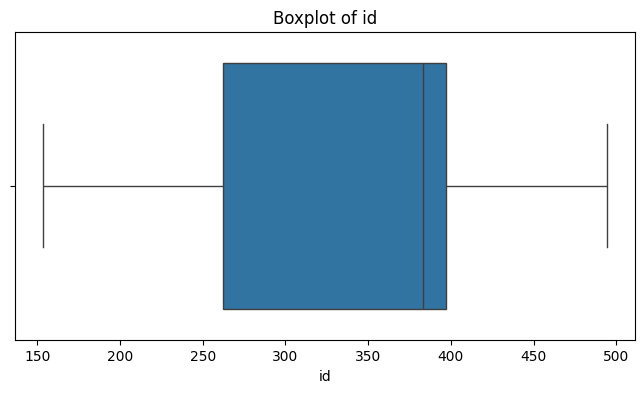

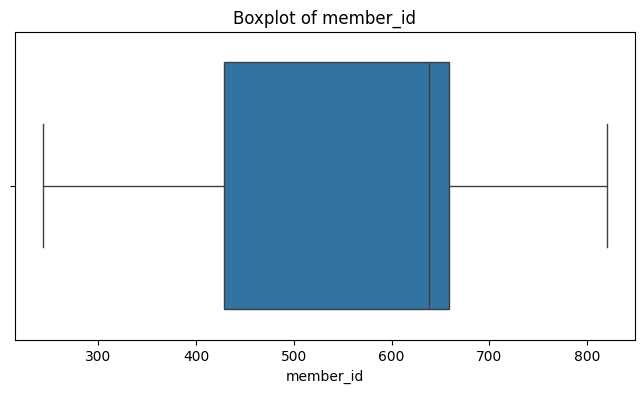

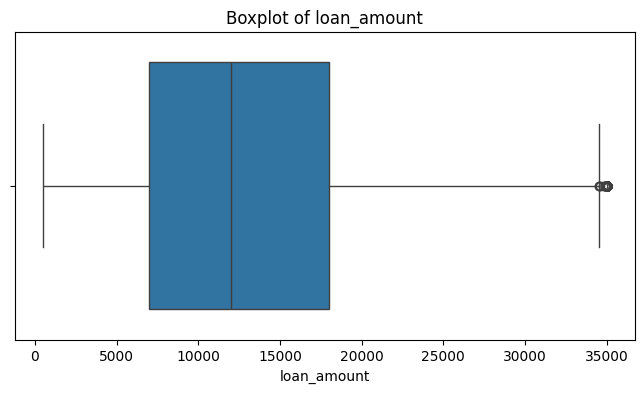

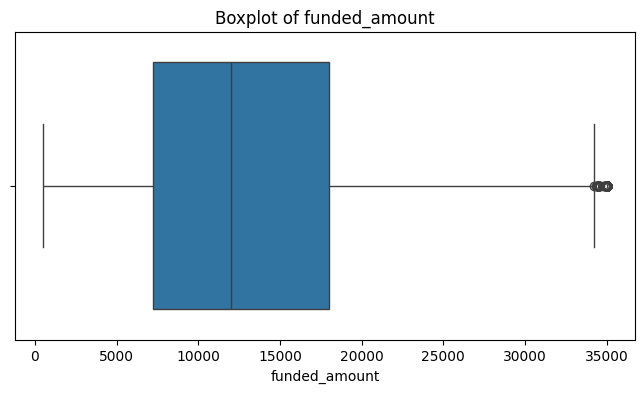

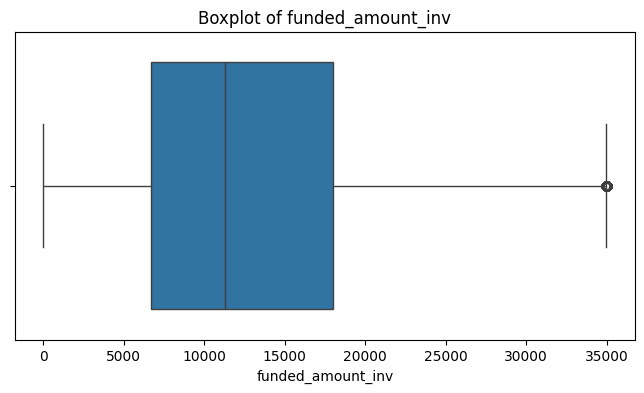

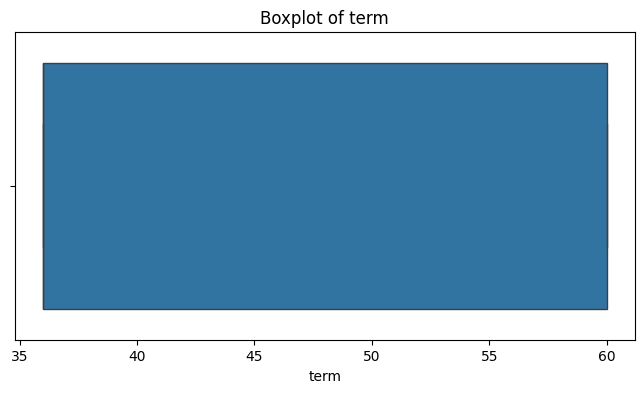

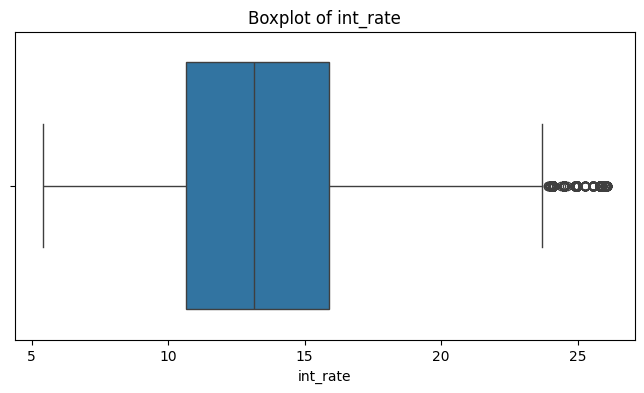

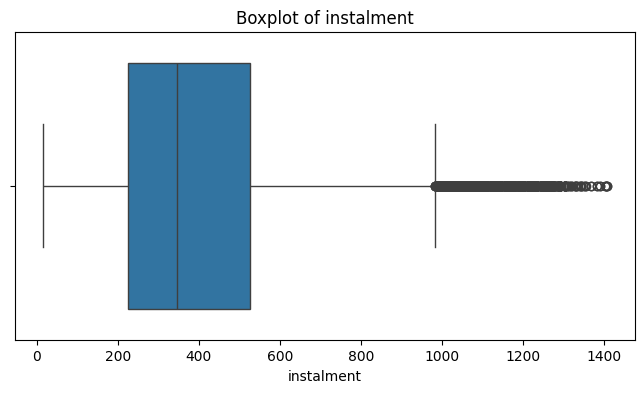

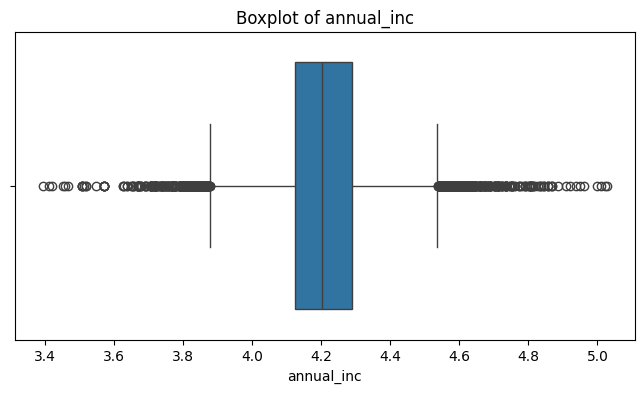

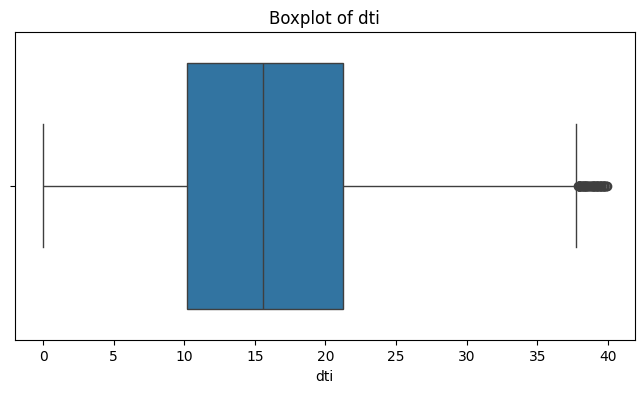

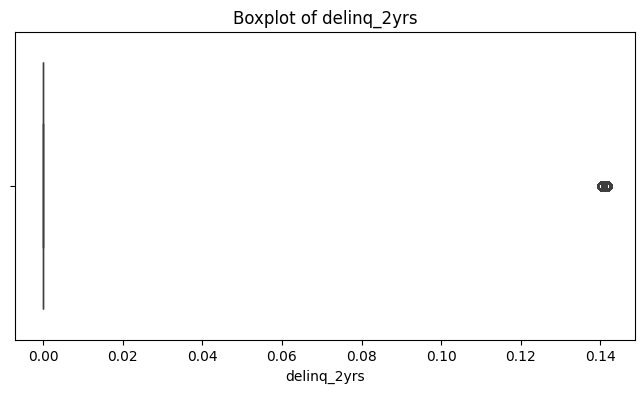

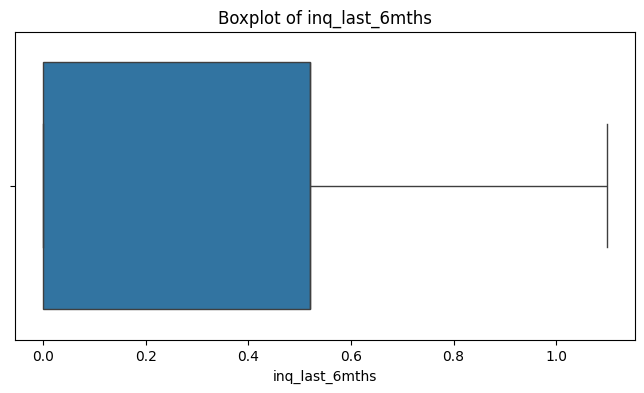

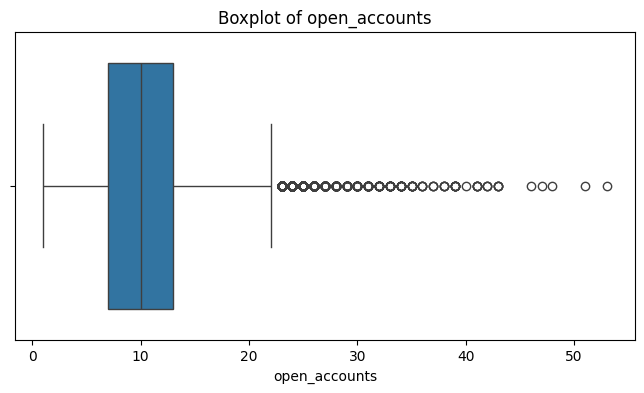

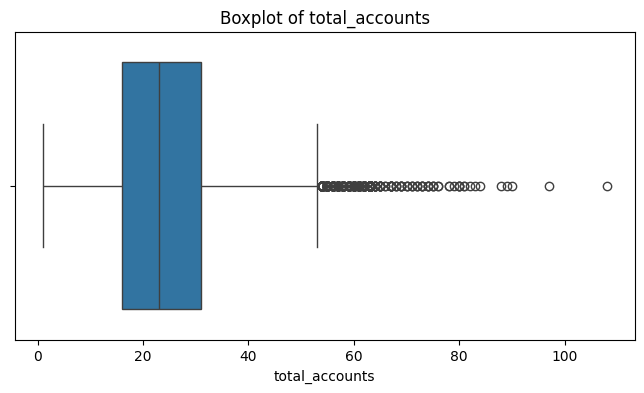

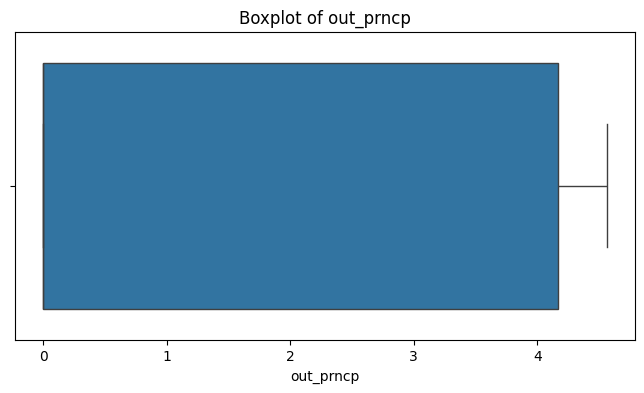

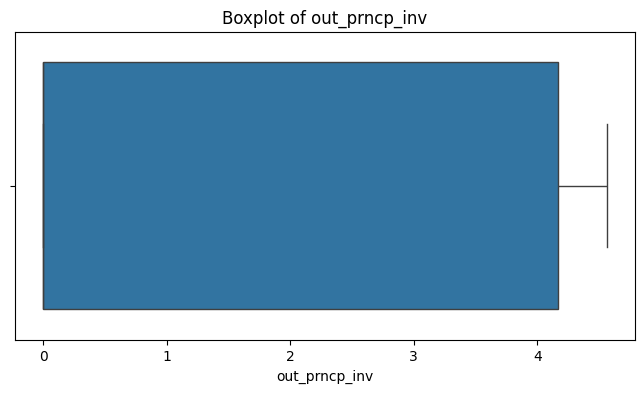

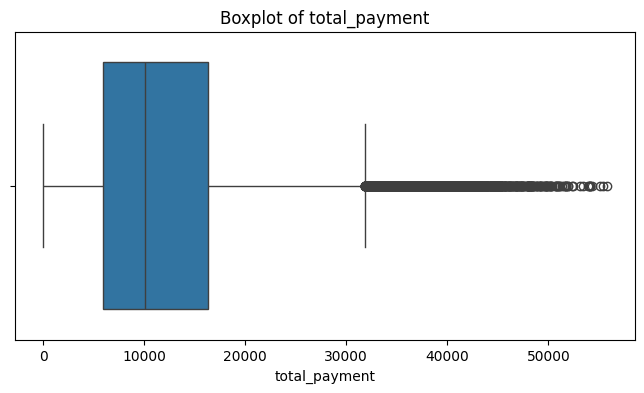

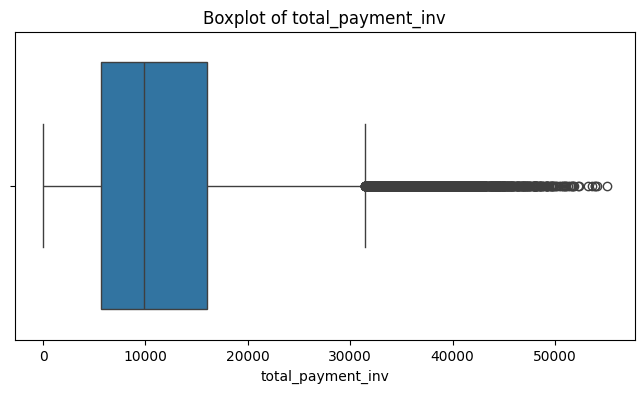

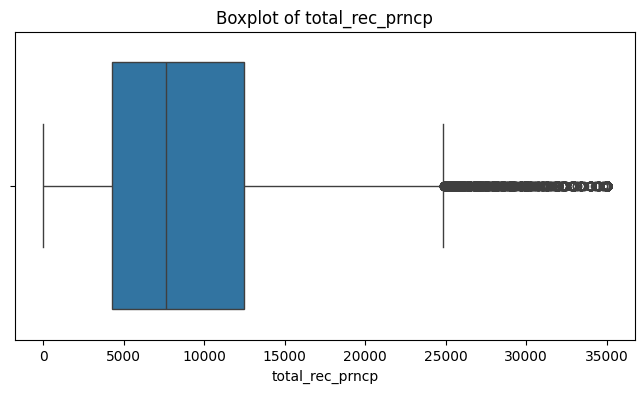

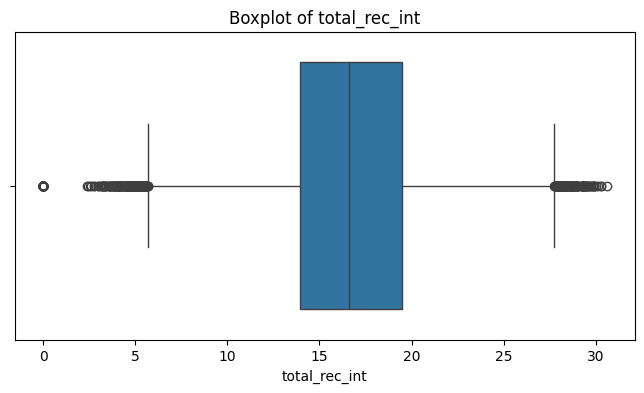

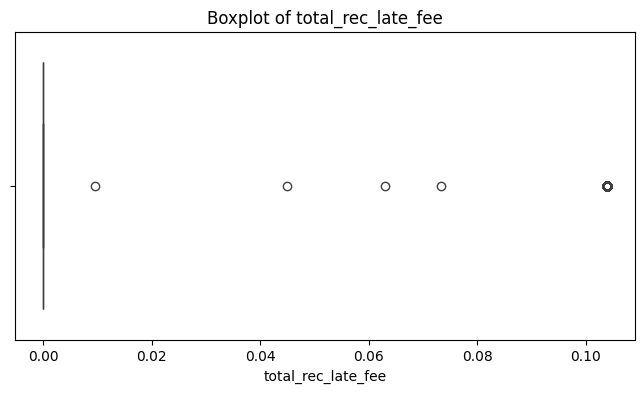

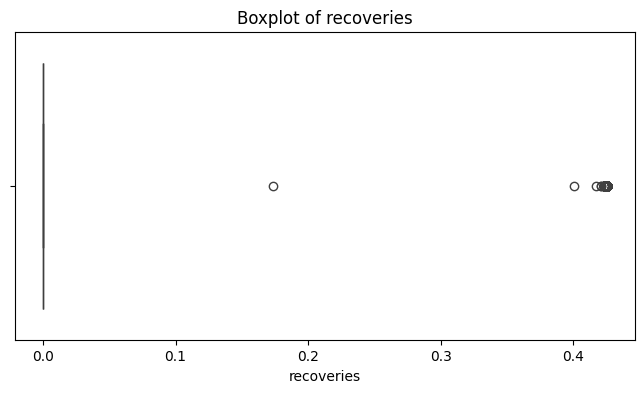

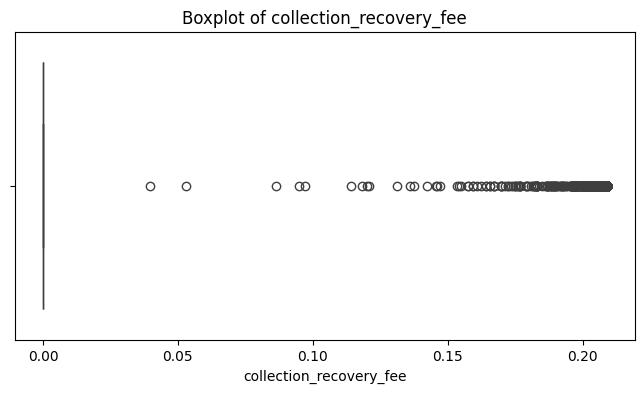

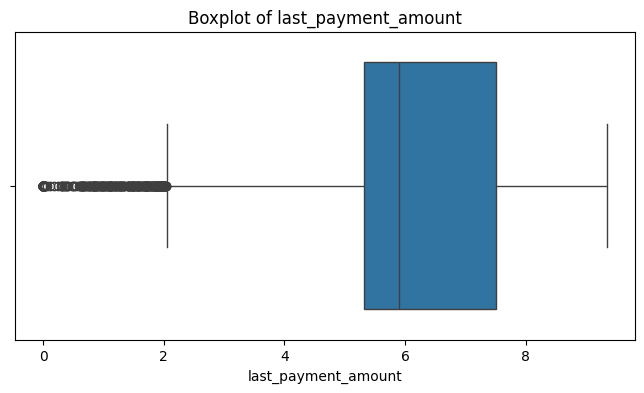

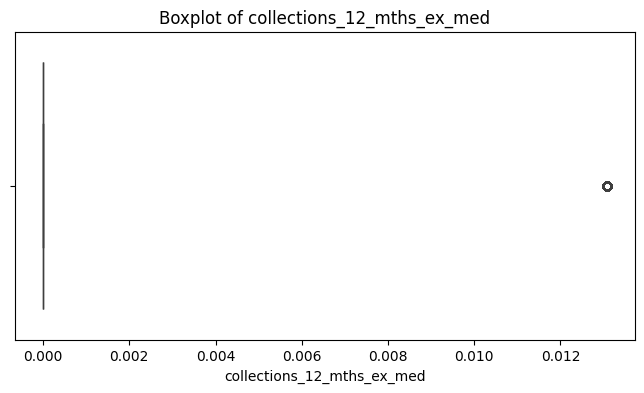

In [16]:
plotter = Plotter(executer.transformed_column_data)

# Visualize skewed columns
plotter.visualize_outliers()

In [17]:
print("\nHandling outliers:")
outlier_summary = executer.handle_outliers(method="remove")


Handling outliers:


AttributeError: 'DataFrameInfo' object has no attribute 'handle_outliers'


Visualizing outliers after handling:


/Users/anoshmalik/AiCore/Exploratory Data Analysis - Customer Loans in Finance/db_analysis.py:308: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))


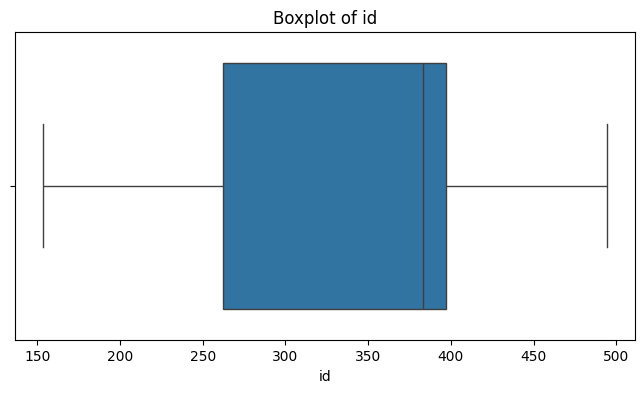

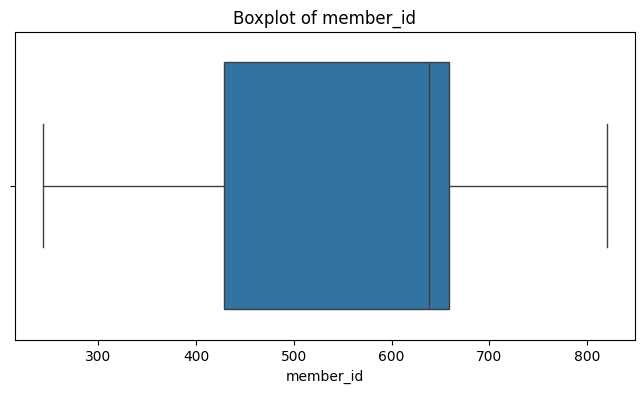

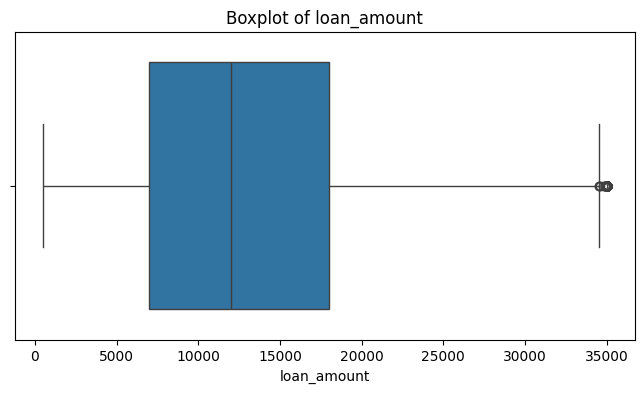

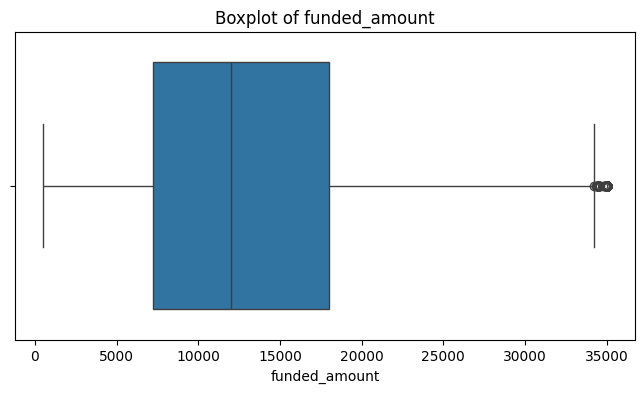

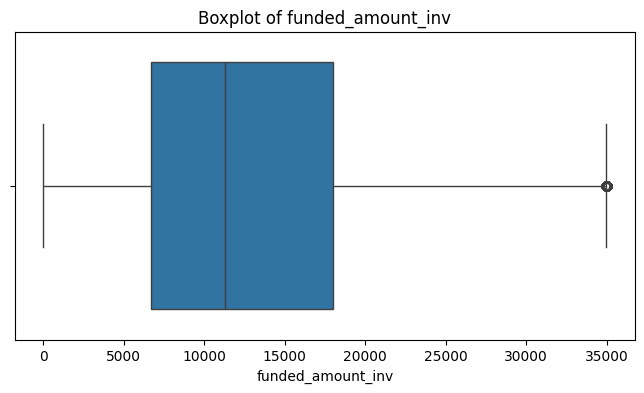

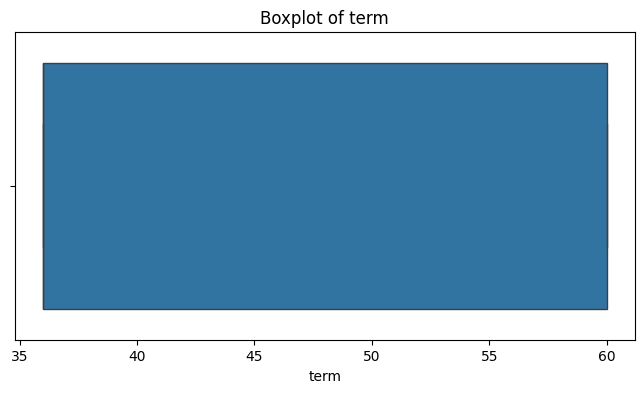

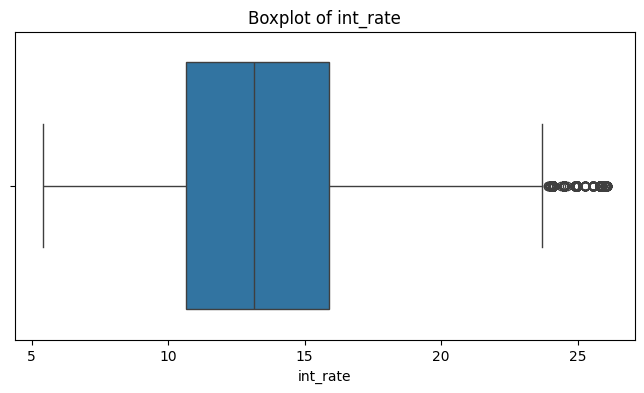

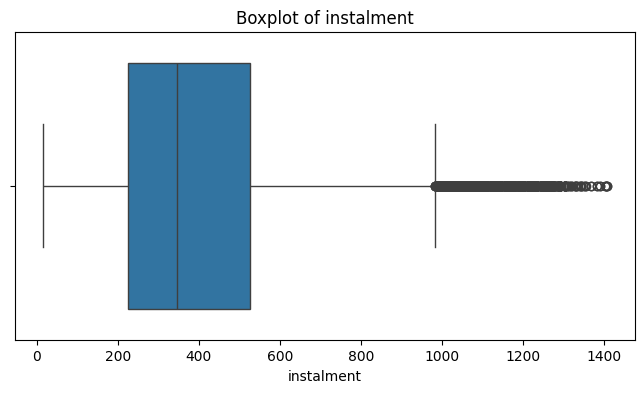

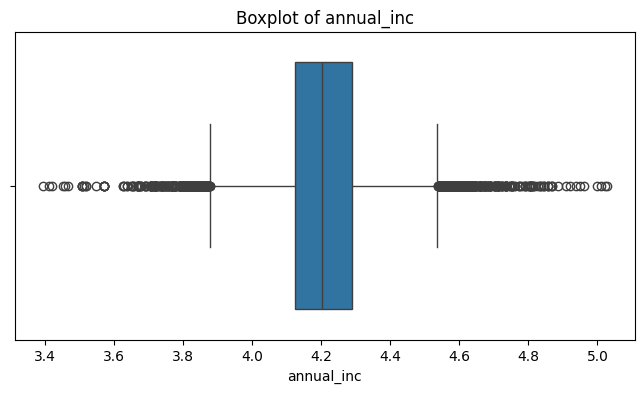

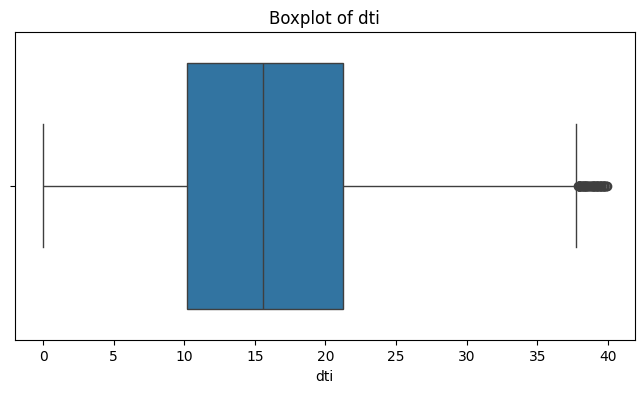

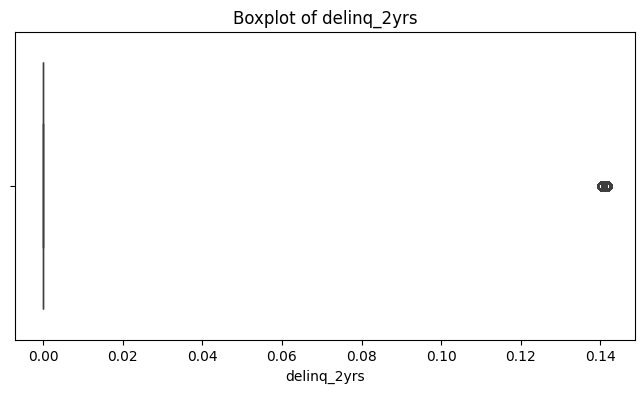

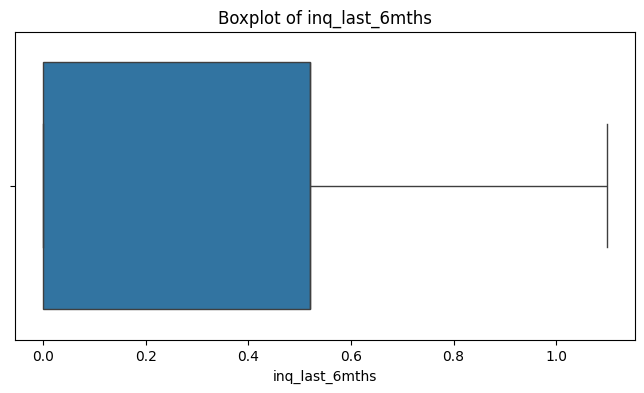

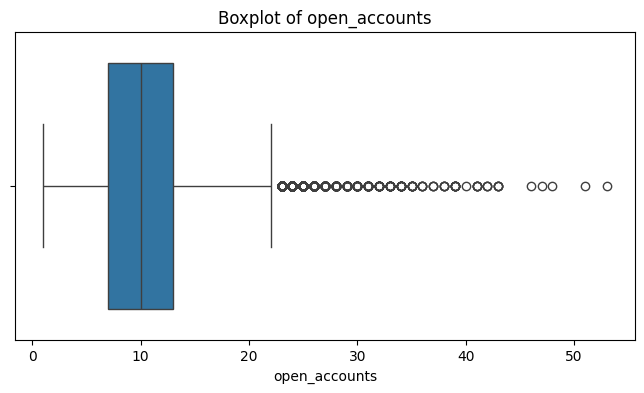

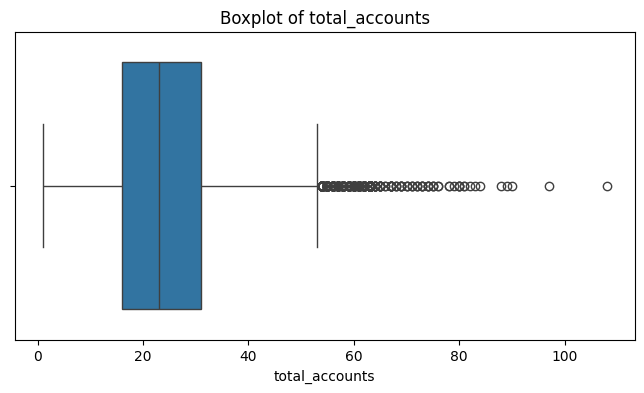

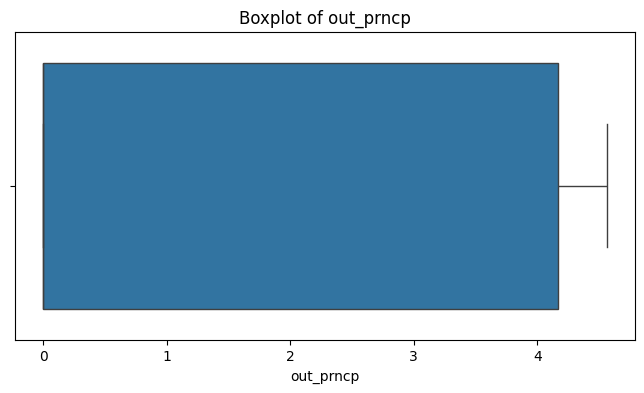

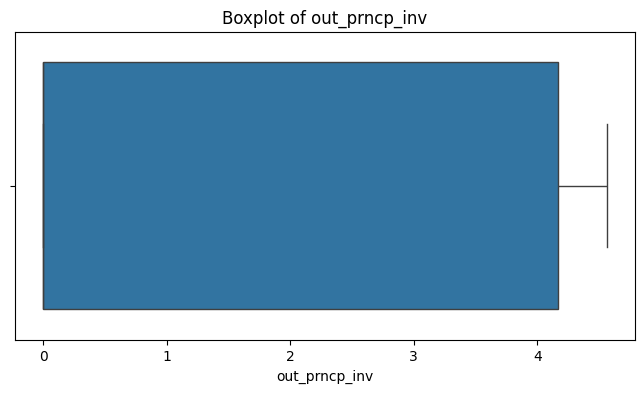

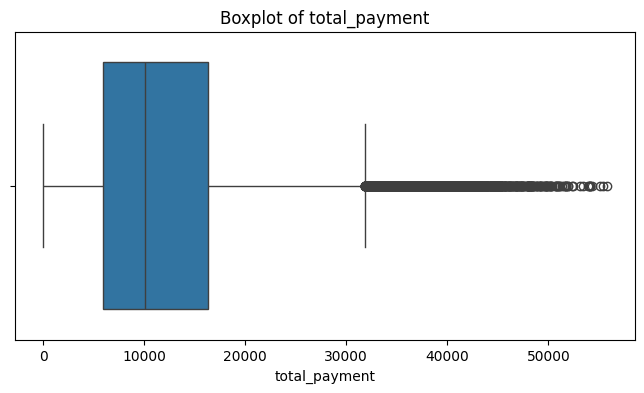

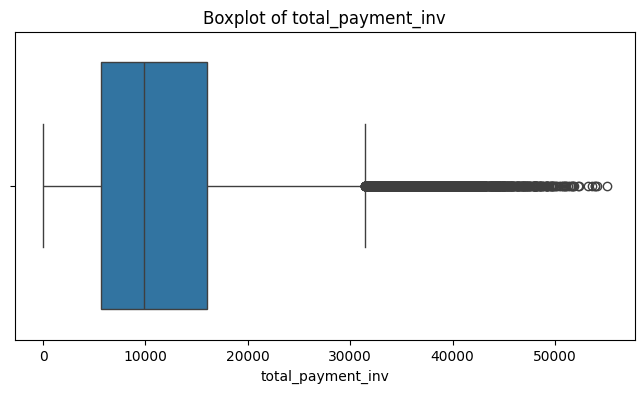

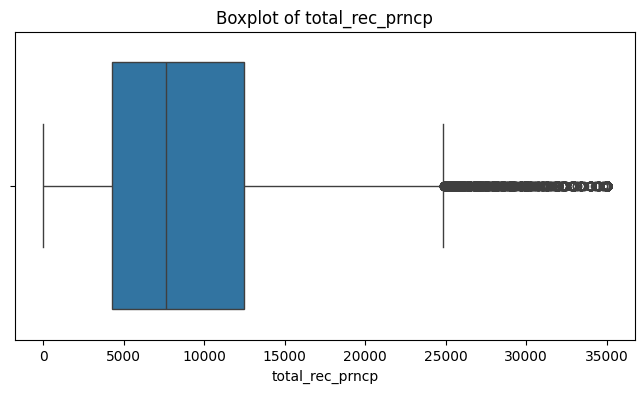

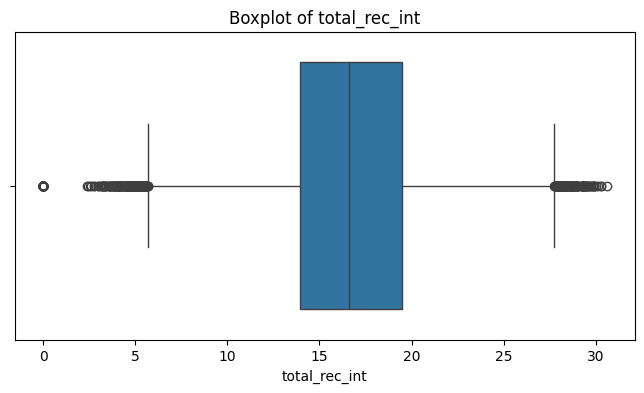

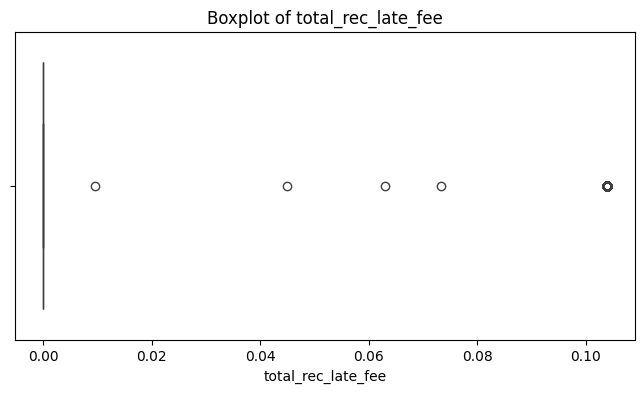

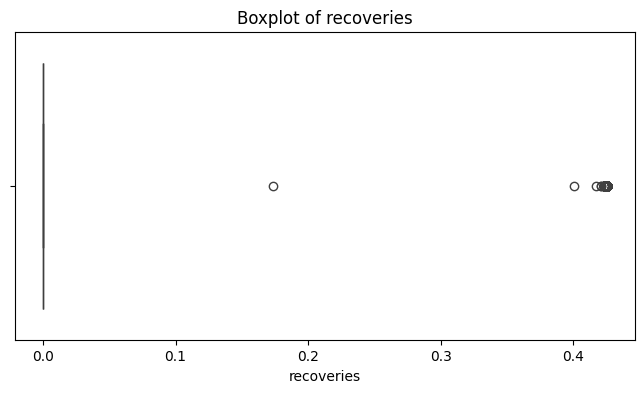

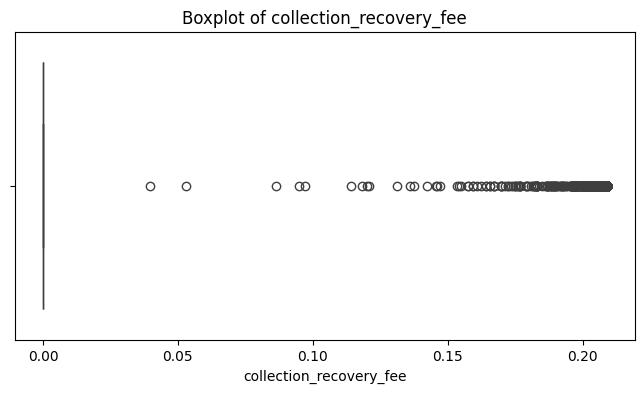

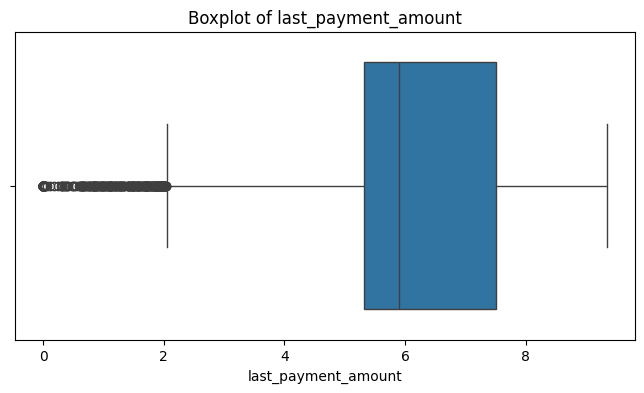

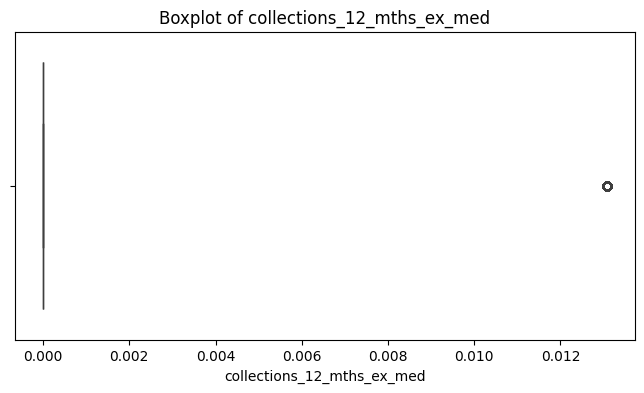

In [60]:
print("\nVisualizing outliers after handling:")
plotter.visualize_outliers()

## Viewing and Correcting Correlation

Visualizing Correlation Matrix:


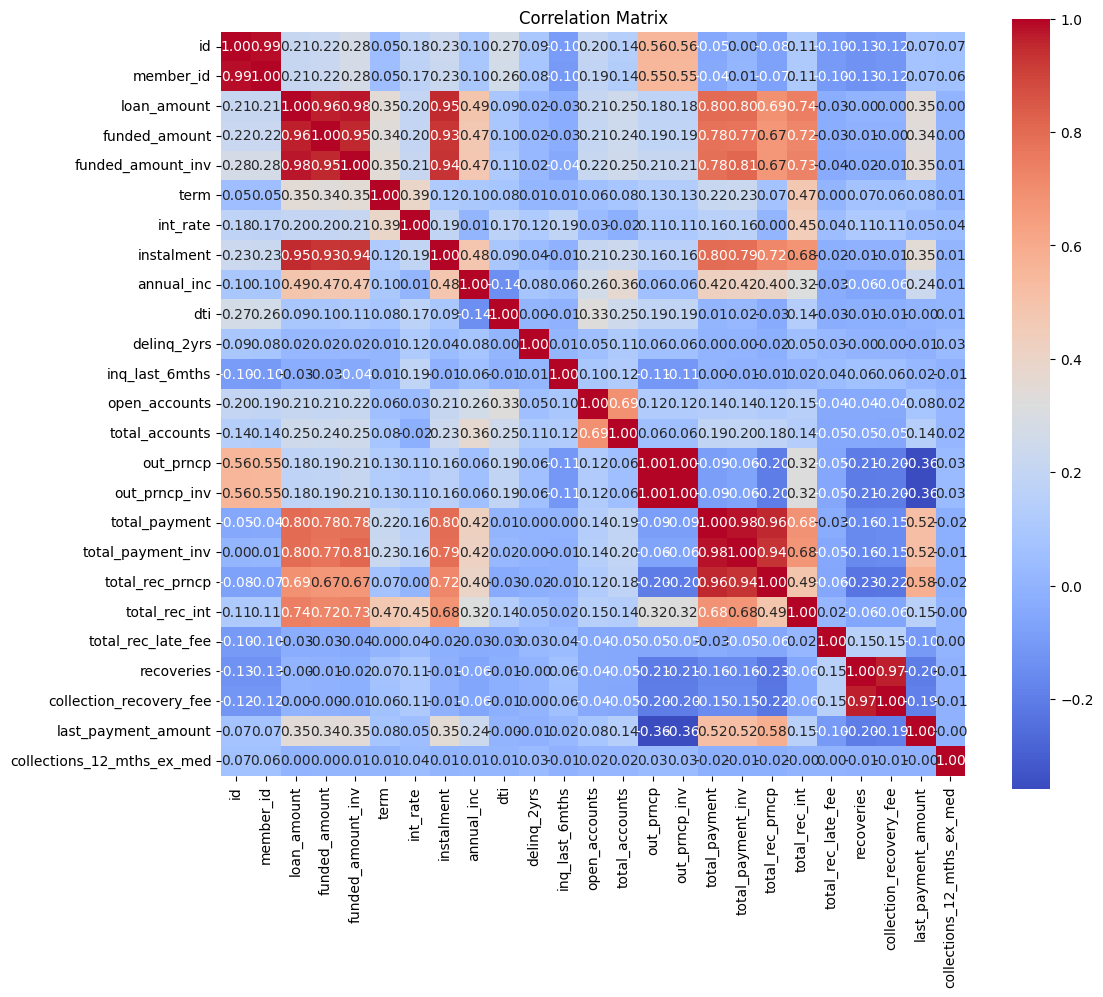

In [18]:
print("Visualizing Correlation Matrix:")
correlation_matrix = plotter.visualize_correlation_matrix()

In [18]:
print("\nIdentifying highly correlated columns:")
numeric_data = executer.transformed_column_data.select_dtypes(include=[np.number])
columns_to_remove = executer.identify_highly_correlated_columns(numeric_data, threshold=0.9)
print(f"Columns to remove: {columns_to_remove}")


Identifying highly correlated columns:
Columns to remove due to high correlation: {'loan_amount', 'instalment', 'total_rec_prncp', 'out_prncp_inv', 'total_payment_inv', 'collection_recovery_fee', 'funded_amount_inv', 'id'}
Columns to remove: ['loan_amount', 'instalment', 'total_rec_prncp', 'out_prncp_inv', 'total_payment_inv', 'collection_recovery_fee', 'funded_amount_inv', 'id']


In [19]:
print("\nRemoving highly correlated columns:")
cleaned_data = executer.remove_highly_correlated_columns(threshold=0.9)


Removing highly correlated columns:
Columns to remove due to high correlation: {'loan_amount', 'instalment', 'total_rec_prncp', 'out_prncp_inv', 'total_payment_inv', 'collection_recovery_fee', 'funded_amount_inv', 'id'}
Removed columns: ['loan_amount', 'instalment', 'total_rec_prncp', 'out_prncp_inv', 'total_payment_inv', 'collection_recovery_fee', 'funded_amount_inv', 'id']
